In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
df =pd.read_csv('Test_Signal_Data.csv')

In [3]:
df

,Current,Fc,Tc,Tr,Tj,Fc_Faulty,Tc_Faulty,Tr_Faulty
0,12.0,0.500,32.111391,35.444293,31.247891,0.500,32.111391,35.444293
1,12.0,0.500,32.263773,34.946917,31.552655,0.500,32.263773,34.946917
2,12.0,0.500,32.136788,35.413207,31.603449,0.500,32.136788,35.413207
3,12.0,0.500,32.416155,35.351035,31.933611,0.500,32.416155,35.351035
4,12.0,0.500,32.111391,35.413207,31.578052,0.500,32.111391,35.413207
...,...,...,...,...,...,...,...,...
10295,6.0,0.125,31.882817,59.473766,40.543212,0.125,31.882817,59.473766
10296,6.0,0.125,31.527258,59.411594,40.847977,0.125,31.527258,59.411594
10297,6.0,0.125,31.552655,59.411594,40.746389,0.125,31.552655,59.411594
10298,6.0,0.125,31.425670,59.038562,40.720992,0.125,31.425670,59.038562


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Current    10300 non-null  float64
 1   Fc         10300 non-null  float64
 2   Tc         10300 non-null  float64
 3   Tr         10300 non-null  float64
 4   Tj         10300 non-null  float64
 5   Fc_Faulty  10300 non-null  float64
 6   Tc_Faulty  10300 non-null  float64
 7   Tr_Faulty  10300 non-null  float64
dtypes: float64(8)
memory usage: 643.9 KB


In [5]:
df_input=df[['Fc','Tr']]

In [6]:

df_input

,Fc,Tr
0,0.500,35.444293
1,0.500,34.946917
2,0.500,35.413207
3,0.500,35.351035
4,0.500,35.413207
...,...,...
10295,0.125,59.473766
10296,0.125,59.411594
10297,0.125,59.411594
10298,0.125,59.038562


In [7]:
df_input.describe()

,Fc,Tr
count,10300.000000,10300.000000
mean,0.438733,62.052014
std,0.244404,11.043789
min,0.125000,34.946917
25%,0.125000,55.743447
50%,0.375000,63.856891
75%,0.611769,68.892822
max,0.998277,90.839534


In [8]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [9]:

data_scaled

array([[0.42941701, 0.00889878],
       [0.42941701, 0.        ],
       [0.42941701, 0.0083426 ],
       ...,
       [0.        , 0.43770856],
       [0.        , 0.43103448],
       [0.        , 0.43214683]])

In [10]:
features=data_scaled
target=data_scaled[:,1]

In [11]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.42941701, 0.00889878],
         [0.42941701, 0.        ]]]),
 array([0.0083426]))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=123, shuffle = False)

In [17]:
x_train.shape

(7210, 2)

In [18]:
x_test.shape

(3090, 2)

In [19]:
win_length=200
batch_size=32
num_features=2
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [20]:
train_generator[0]

(array([[[0.42941701, 0.00889878],
         [0.42941701, 0.        ],
         [0.42941701, 0.0083426 ],
         ...,
         [0.42941701, 0.0083426 ],
         [0.42941701, 0.01779755],
         [0.42941701, 0.01612903]],
 
        [[0.42941701, 0.        ],
         [0.42941701, 0.0083426 ],
         [0.42941701, 0.00723026],
         ...,
         [0.42941701, 0.01779755],
         [0.42941701, 0.01612903],
         [0.42941701, 0.02057842]],
 
        [[0.42941701, 0.0083426 ],
         [0.42941701, 0.00723026],
         [0.42941701, 0.0083426 ],
         ...,
         [0.42941701, 0.01612903],
         [0.42941701, 0.02057842],
         [0.42941701, 0.01724138]],
 
        ...,
 
        [[0.42941701, 0.01501669],
         [0.42941701, 0.0083426 ],
         [0.42941701, 0.01223582],
         ...,
         [0.42941701, 0.01835373],
         [0.42941701, 0.02614016],
         [0.42941701, 0.02502781]],
 
        [[0.42941701, 0.0083426 ],
         [0.42941701, 0.01223582],
       

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

In [22]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 128)          67072     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 128)          0         
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [22]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50
220/220 [==============================] - 88s 371ms/step - loss: 0.0031 - mean_absolute_error: 0.0430 - val_loss: 0.0975 - val_mean_absolute_error: 0.3074
Epoch 2/50
220/220 [==============================] - 79s 360ms/step - loss: 0.0092 - mean_absolute_error: 0.0583 - val_loss: 0.1039 - val_mean_absolute_error: 0.3151
Epoch 3/50
220/220 [==============================] - 78s 357ms/step - loss: 0.0119 - mean_absolute_error: 0.0639 - val_loss: 0.1181 - val_mean_absolute_error: 0.3342


In [37]:
model.evaluate(test_generator, verbose=0) 

[0.1181274801492691, 0.33416062593460083]

In [24]:
# additional

#model.evaluate(test_generator, verbose=0)
#predictions=model.predict(train_generator)
#predictions.shape[0]
predictions

array([[0.9262025 ],
       [0.9262174 ],
       [0.92622566],
       ...,
       [0.9289591 ],
       [0.9288176 ],
       [0.92864144]], dtype=float32)

In [36]:
# x_train
# x_train[:,1:][win_length:]
# df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_train[:,1:][win_length:])],axis=1)
# df_pred
# rev_trans=scaler.inverse_transform(df_pred)
# df_final['App_Pred']=rev_trans[:,1]
#df_pred

In [39]:

predictions=model.predict(test_generator)

91/91 [==============================] - 10s 106ms/step


In [40]:
predictions.shape[0]

2890

In [41]:

y_test

array([0.98609566, 0.96774194, 0.98053393, ..., 0.43770856, 0.43103448,
       0.43214683])

In [42]:

x_test

array([[0.62506092, 0.98609566],
       [0.62402899, 0.96774194],
       [0.62299863, 0.98053393],
       ...,
       [0.        , 0.43770856],
       [0.        , 0.43103448],
       [0.        , 0.43214683]])

In [43]:
x_test[:,1:][win_length:]

array([[0.86373749],
       [0.8759733 ],
       [0.8759733 ],
       ...,
       [0.43770856],
       [0.43103448],
       [0.43214683]])

In [44]:

df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [45]:

df_pred

,0,0
0,0.887573,0.863737
1,0.887523,0.875973
2,0.887496,0.875973
3,0.887488,0.869299
4,0.887502,0.864850
...,...,...
2885,0.847687,0.438821
2886,0.847650,0.437709
2887,0.847602,0.437709
2888,0.847560,0.431034


In [46]:
rev_trans=scaler.inverse_transform(df_pred)

In [47]:

rev_trans

array([[ 0.90009684, 83.22346514],
       [ 0.90005333, 83.907357  ],
       [ 0.90002954, 83.907357  ],
       ...,
       [ 0.86519109, 59.41159413],
       [ 0.86515445, 59.03856221],
       [ 0.8651595 , 59.1007342 ]])

In [48]:
df_final=df_input[predictions.shape[0]*-1:]

In [49]:
df_final.count()

Fc    2890
Tr    2890
dtype: int64

In [50]:
df_final['App_Pred']=rev_trans[:,1]

C:\Users\PREETHAM\AppData\Local\Temp\ipykernel_4668\2540396308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,1]


In [51]:

df_final

,Fc,Tr,App_Pred
7410,0.375,83.223465,83.223465
7411,0.375,83.907357,83.907357
7412,0.375,83.907357,83.907357
7413,0.375,83.534325,83.534325
7414,0.375,83.285637,83.285637
...,...,...,...
10295,0.125,59.473766,59.473766
10296,0.125,59.411594,59.411594
10297,0.125,59.411594,59.411594
10298,0.125,59.038562,59.038562


<Axes: >

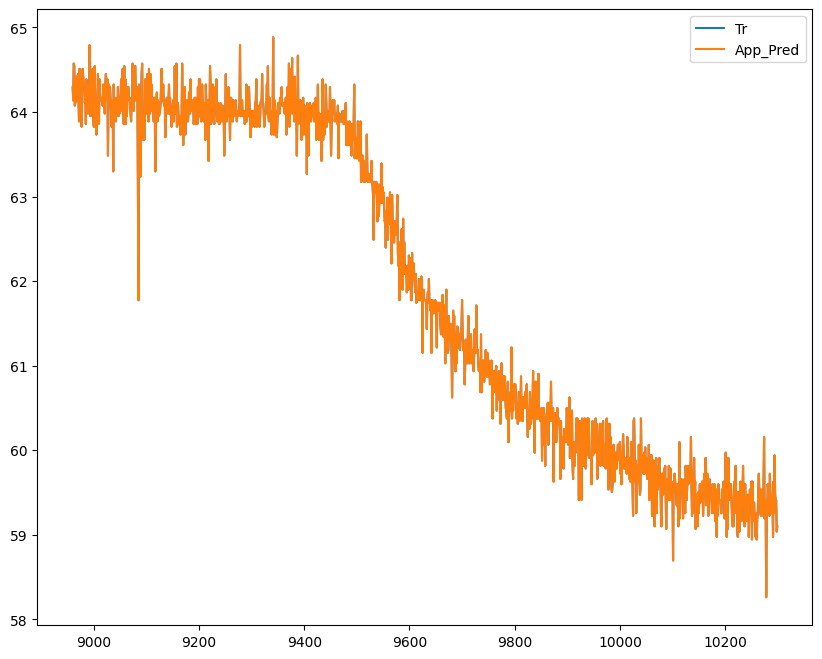

In [203]:
df_final[['Tr','App_Pred']].plot()

In [179]:
print(model.layers[0].get_weights())

[array([[ 2.93706954e-02, -2.55821198e-02, -5.40796667e-02,
         9.93647277e-02,  4.94287163e-02, -8.01499188e-03,
        -1.05782457e-01,  1.49076194e-01,  1.46702886e-01,
        -3.36452425e-02, -9.26269591e-03,  7.65553862e-02,
         5.81281483e-02, -9.68537331e-02,  1.45083576e-01,
        -1.47676319e-01, -5.87966815e-02,  1.23798937e-01,
        -7.41938427e-02, -1.23982117e-01,  1.69993430e-01,
         1.83953047e-02, -1.66836888e-01, -1.33072630e-01,
         1.07957691e-01,  1.32719249e-01, -1.23394907e-01,
         1.25378251e-01,  1.39730930e-01, -1.42960131e-01,
        -1.07874043e-01, -1.05401419e-01, -7.40970671e-03,
        -3.32040340e-02, -2.43360102e-02,  7.57684857e-02,
         1.19036436e-03, -3.49442214e-02, -2.62492597e-02,
        -8.34495798e-02,  9.93714929e-02, -1.53070807e-01,
         6.44502938e-02, -1.05074331e-01, -8.68958980e-02,
         8.60798359e-02,  1.31466687e-01,  2.34984010e-02,
        -7.55314007e-02, -1.32688686e-01, -1.27048433e-

In [181]:
print(model.layers[1].get_weights())

[array([[-0.05480881,  0.0747395 , -0.052416  , ..., -0.04386514,
         0.12672223, -0.12175874],
       [-0.1463923 , -0.14110747,  0.032519  , ...,  0.100805  ,
         0.12502222, -0.0996304 ],
       [ 0.11977525, -0.08874092,  0.15010695, ..., -0.04613177,
        -0.12049834,  0.02772523],
       ...,
       [-0.15359616,  0.09587391, -0.0789265 , ...,  0.11983423,
         0.14535241,  0.02446233],
       [-0.00419918,  0.0824492 , -0.01020266, ..., -0.03477617,
        -0.08764054,  0.0560313 ],
       [-0.03050353, -0.12278698, -0.08224546, ...,  0.14939688,
        -0.01911756,  0.04212877]], dtype=float32), array([[-0.07698798,  0.0256577 ,  0.01504354, ...,  0.0057388 ,
         0.06250341,  0.06905006],
       [-0.01941532,  0.01372087, -0.17131864, ...,  0.05947554,
        -0.14818609,  0.06497662],
       [-0.07515326, -0.02651028, -0.04977953, ..., -0.00578357,
        -0.03572923,  0.14074518],
       ...,
       [ 0.02820635, -0.09915983, -0.07694969, ..., -0.134

In [182]:
print(model.layers[2].get_weights())

[array([[ 5.76321781e-02, -1.84028596e-02,  8.05952847e-02, ...,
        -2.92849094e-02, -7.60582611e-02,  1.11180112e-01],
       [ 5.30964136e-03, -1.23805307e-01,  9.80345160e-02, ...,
        -1.44904718e-01, -1.01179376e-01,  1.14463702e-01],
       [-1.54167414e-04,  1.54671684e-01,  1.38381138e-01, ...,
         7.23615140e-02,  7.10780770e-02, -7.94079155e-02],
       ...,
       [-6.12870678e-02, -4.74722460e-02,  1.17137685e-01, ...,
        -6.98556900e-02,  1.72713250e-02, -8.87204707e-03],
       [-9.55766439e-02,  6.60173595e-03, -1.54768825e-02, ...,
        -1.35611147e-02,  8.55542272e-02, -2.94491202e-02],
       [-1.42880753e-01, -6.31949753e-02,  4.84234095e-02, ...,
         7.98231363e-03,  6.59741610e-02, -2.91688889e-02]], dtype=float32), array([[ 0.03001547,  0.005058  ,  0.02356689, ...,  0.03747818,
        -0.2669287 ,  0.0662753 ],
       [ 0.02372596,  0.02681065,  0.04414796, ..., -0.04766072,
        -0.03380624,  0.0027659 ],
       [-0.10567878, -0.00

In [183]:
print(model.layers[3].get_weights())

[array([[ 0.33879188],
       [-0.2975754 ],
       [-0.14433116],
       [-0.2163187 ],
       [-0.02548102],
       [ 0.26071706],
       [-0.32100433],
       [ 0.05351692],
       [-0.04081616],
       [ 0.00427684],
       [ 0.03047889],
       [-0.07064453],
       [ 0.27788904],
       [ 0.02861661],
       [ 0.1217308 ],
       [ 0.31296828],
       [-0.05083016],
       [-0.34263703],
       [ 0.1972982 ],
       [-0.0421209 ],
       [ 0.16934583],
       [ 0.0937008 ],
       [-0.26108664],
       [-0.05837381],
       [-0.1001758 ],
       [-0.07245973],
       [-0.26271647],
       [ 0.3254964 ],
       [ 0.2598594 ],
       [ 0.32780948],
       [ 0.08407173],
       [ 0.18594816],
       [ 0.25005224],
       [ 0.13221616],
       [ 0.02879423],
       [ 0.08511281],
       [-0.26032245],
       [ 0.04033881],
       [-0.08638847],
       [ 0.06645012],
       [-0.3069006 ],
       [-0.0660328 ],
       [ 0.04074484],
       [-0.3070549 ],
       [ 0.208536  ],
       [-

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator



# Define a function to predict future values for both 'Fc' and 'Tr'
def predict_future_values(model, input_data, win_length, num_predictions=40):
    predictions = []

    current_input = input_data[-win_length:]

    for _ in range(num_predictions):
        current_input = current_input.reshape((1, win_length, num_features))
        next_prediction = model.predict(current_input)
        predictions.append(next_prediction[0])

        current_input = np.roll(current_input, -1, axis=1)
        current_input[0, -1, -1] = next_prediction[0, -1]

    return predictions

# Use the function to predict future values for both 'Fc' and 'Tr'
future_predictions = predict_future_values(model, x_train, win_length, num_predictions=40)

# Invert scaling to get the actual values
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, num_features))

print("Predicted Future Values:")
print(future_predictions)


1/1 [==============================] - 0s 42ms/step
Predicted Future Values:
[[ 0.93584263 86.87979   ]
 [ 0.93753403 87.06068   ]
 [ 0.9414106  87.35898   ]
 [ 0.9464754  87.68073   ]
 [ 0.95104396 87.924     ]
 [ 0.9539359  88.052124  ]
 [ 0.955188   88.09711   ]
 [ 0.95554316 88.10798   ]
 [ 0.95563173 88.11152   ]
 [ 0.95566237 88.11112   ]
 [ 0.9556058  88.10406   ]
 [ 0.9554489  88.09203   ]
 [ 0.9552478  88.07924   ]
 [ 0.9550573  88.06776   ]
 [ 0.9548861  88.05698   ]
 [ 0.95471567 88.04572   ]
 [ 0.9545337  88.03378   ]
 [ 0.95434433 88.02164   ]
 [ 0.95415556 88.00967   ]
 [ 0.9539698  87.99779   ]]


In [62]:
import pandas as pd
import tensorflow as tf
from openpyxl import Workbook
import numpy as np

# Create an Excel workbook
workbook = Workbook()
sheet = workbook.active

# Get the weights of the model's layers
model_weights = model.get_weights()


for i, layer_weights in enumerate(model_weights):
    layer_name = f'Layer_{i}'
    sheet[f'A{i + 1}'] = layer_name  # Store the layer name in column A
    sheet[f'B{i + 1}'] = 'Weights'  # Column B header
    for j, weight in enumerate(layer_weights):
        sheet[f'A{i + j + 2}'] = f'Weight_{j + 1}'  # Store weight names in column A
        flat_weight = np.array(weight).flatten()  # Flatten the weight array
        for k, w in enumerate(flat_weight):
            sheet[f'B{i + j + 2 + k}'] = float(w)  


workbook.save('model_weights1.xlsx')
